# About

In [39]:
import graphviz.backend as be
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

### graphviz for classification model

In [41]:
dtc = tree.DecisionTreeClassifier()

In [42]:
from sklearn.tree import plot_tree


In [43]:
from sklearn.tree import plot_tree

In [44]:
df1 = pd.read_csv('/Users/manu/Downloads/Churn_Modelling.csv')

In [45]:
Gender_dummies = pd.get_dummies(df1['Gender'], drop_first = True)
Geography_dummies = pd.get_dummies(df1['Geography'], drop_first = True)

In [46]:
df2 = pd.concat([df1, Gender_dummies, Geography_dummies], axis = 1)

In [47]:
df_final = df2.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1)

In [48]:
df_final_features = list(df_final.columns.values)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = df_final.drop(['Exited'], axis = 1)
y = df_final.Exited

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [52]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)
     

DecisionTreeClassifier()

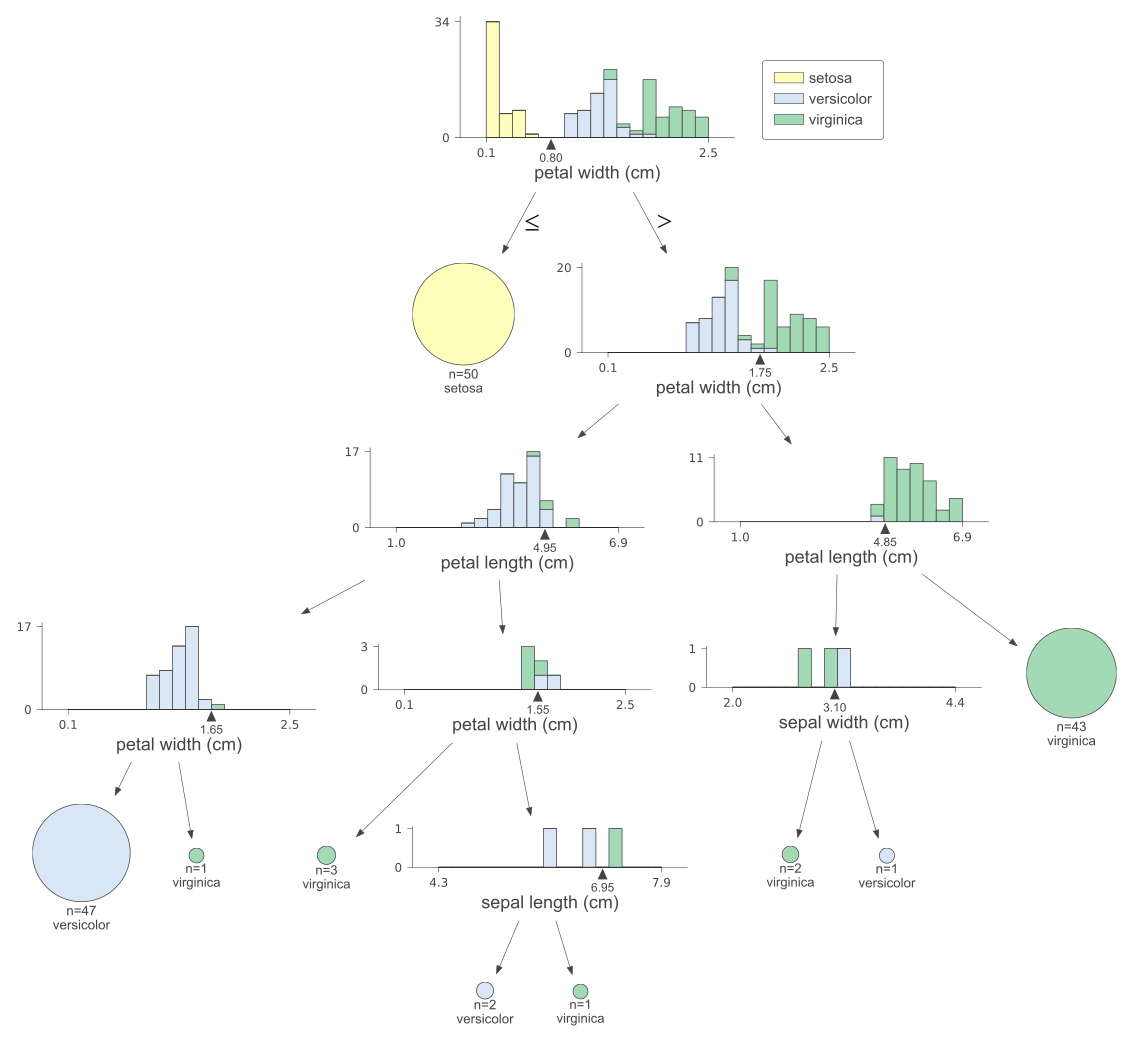

<Figure size 3600x3600 with 0 Axes>

In [53]:
fig = plt.figure(figsize=(50,50))

viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
                scale = 2)
viz


### graphviz for regression model

In [54]:
# for simple implementation let's load inbuild data set : bostan data set

import pandas as pd
import numpy as np
boston = load_boston()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [55]:
dtr3 = tree.DecisionTreeRegressor(max_depth = 3)

In [56]:
X_train = boston.data
y_train = boston.target
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [57]:
viz = dtreeviz(dtr3,
               X_train,
               y_train,
               target_name='price',
               feature_names=boston.feature_names,
               scale=2
              )

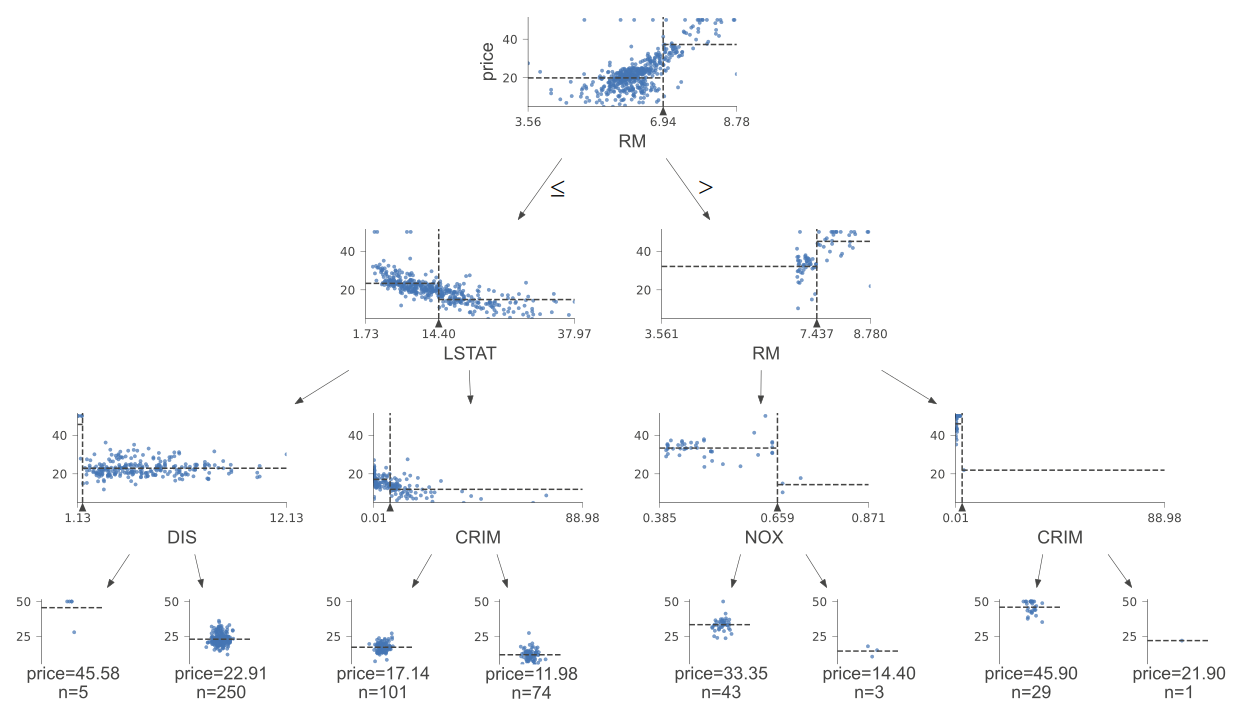

In [58]:
viz

In [59]:
dtr = tree.DecisionTreeRegressor()

In [60]:
X_train = boston.data
y_train = boston.target
dtr.fit(X_train, y_train)

DecisionTreeRegressor()


KeyboardInterrupt



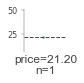

In [61]:
viz = dtreeviz(dtr,
               X_train,
               y_train,
               target_name='price',
               feature_names=boston.feature_names,
               scale=2
              )

### Tracking the prediction path of an random data point

In [ ]:
X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

In [ ]:
X = iris.data[np.random.randint(0, len(iris.data)),:]

In [ ]:
viz = dtreeviz(dtc, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X)
viz

 ### Displaying node numbers

In [ ]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)
     

In [ ]:
fig = plt.figure(figsize=(50,50))

viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
                scale = 2,
              show_node_labels = True)
viz


### Hyperparameter tunning 

In [62]:

param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
   

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [ ]:
reg.fit(X_train,y_train)